This notebook will explore the convergence of a stochastic hopfield model. 

# Set up
- Predefine the number of neurons $N$
- Predefine the number of asynchournous stochastic updates $T$
- create function that generates random patterns of size $p$

In [1]:
import numpy as np

###################### Pre-define constants #####################3
N_neurons = 200
T = 200000   # Number of asynchronous stochastic updates
p = 7


randomPatterns = []
for i in range(p):
    pattern = np.asarray(list(map(lambda x: -1 if x==0 else 1, 
                                  np.random.randint(2, size=N_neurons))))
    randomPatterns.append(pattern)

randomPatterns = np.asarray(randomPatterns)





An example of the random pattern will be shown here in an 10 by 20 grid. 

<function matplotlib.pyplot.show(*args, **kw)>

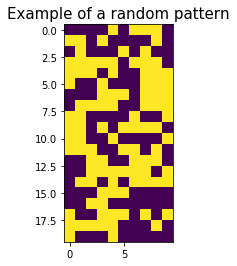

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.title('Example of a random pattern',size=15)
plt.imshow(randomPatterns[0].reshape(20,10))
plt.show

# Hebbs rule

*Hebbs rule* will be used to store the random patterns in the network. Each element in the weight matrix will be assigned as follows


\begin{equation}
w_{ij} = \frac{1}{N} \sum_{\mu=1}^{p}x_i^{(\mu)}x_j^{(\mu)} \quad \text{and} \quad \theta_i=0
\end{equation}

In [3]:
def generateWeightMatrix(storedPatterns):   
    W = np.zeros((N_neurons, N_neurons))                 
    for i in range(np.size(W,0)):               
        for j in range(np.size(W,1)):           
            Sum = 0
            if(j==i):   
                W[i][j]= 0
            else:
                for u in range(len(storedPatterns)):            
                     Sum = Sum + storedPatterns[u][i]*storedPatterns[u][j]
                W[i][j] = Sum /N_neurons
    return W


# Running the simulation

## when p= 7

Let $S_i$ be the state of neuron $i$. A random neuron $i$ will be randomly chosen to be asynchrounsly updated according to the following rule

\begin{equation}
        S_i = 
        \begin{cases}
            +1 \quad \text{with probability } ,&  P(b_i)\\
            -1 \quad \text{with probability }, & 1-P(b_i)
        \end{cases} \quad \text{where} \quad b_i = \sum_{j} w_{ij} S_j,  \quad P(x)= \frac{1}{1+\text{exp}(-2\beta b_i)} , \quad \beta=2
\end{equation}

The order parameter $m_\mu$ is used to check whether the noisy dynamics of the network settles into a steady state after feeding pattern $\textbf{x}^{(\mu)}$
\begin{equation}
m_\mu(T) = \frac{1}{T}\sum_{t=1}^{T} \bigg( \frac{1}{N} \sum_{i=1}^{N}S_i(t)x_i^{(\mu)} \bigg)
\end{equation}



0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:25:30


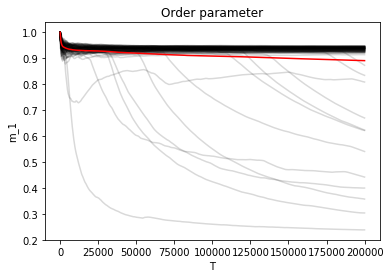

In [4]:
import math 
import pyprind
import time
from collections import Counter

    
m_1_average = []
for i in pyprind.prog_bar(range(100)):
    
    
#########################  Create random pattern ##############################
    
    randomPatterns = []
    for i in range(p):
        pattern = np.asarray(list(map(lambda x: -1 if x==0 else 1, 
                                      np.random.randint(2, size=N_neurons))))
        randomPatterns.append(pattern)
    randomPatterns = np.asarray(randomPatterns)
    Weights = generateWeightMatrix(randomPatterns)
    neurons_currentState = np.copy(randomPatterns[0])
    noisy_dynamics_average = []
    
    
####################### Run each experiment   ##################################

    for j in range(T):
        selectedNeuron = np.random.choice(np.arange(N_neurons), 1)
        

        #Perform one stochastic asynchronous update 
        noisy_dynamics_average.append(np.dot(neurons_currentState,
                                         randomPatterns[0].T)/N_neurons)
    
        b_i = np.dot(Weights[selectedNeuron,:], neurons_currentState.T)
        prob = 1/(1+math.exp(-4*b_i))
        #print(prob)
        neurons_updatedState = np.copy(neurons_currentState)
    
        neurons_updatedState[selectedNeuron] = np.random.choice([-1,1],
                                                                1,p=[1-prob , prob])
    
        neurons_currentState = np.copy(neurons_updatedState)
        final_state= np.copy(neurons_updatedState)                         
        

    order_parameter_t = np.cumsum(noisy_dynamics_average)


    m1_for_i_realisation = list(map(lambda x, y: x / y, 
                                    order_parameter_t, np.arange(1,T+1)))
    
    m_1_average.append(m1_for_i_realisation)
    plt.title('Order parameter')
    plt.plot(np.arange(1,T+1), m1_for_i_realisation, alpha=0.15,c ='k')
    plt.xlabel('T')
    plt.ylabel('m_1')
    

    
#np.mean(mean_adj_rand_score, axis=0)
plt.plot(np.arange(1,T+1), np.mean(m_1_average,axis=0), alpha=1,c ='r')
plt.show()

- The <span style="color:red"> red</span> line represents $\langle m_\mu \rangle$
- Grey lines are different realisations, the black cluster at the top are many realisations clumped together

[0.89056764 0.89056743 0.89056722 0.89056701 0.89056681 0.8905666
 0.8905664  0.89056619 0.89056599 0.89056578]


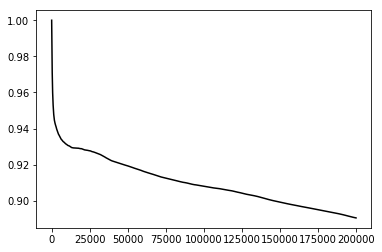

In [5]:
print(np.mean(m_1_average,axis=0)[-10:])
plt.plot(np.arange(1,T+1), np.mean(m_1_average,axis=0), alpha=1,c ='k')
plt.show()

## Repeating the when p=45

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:24:14


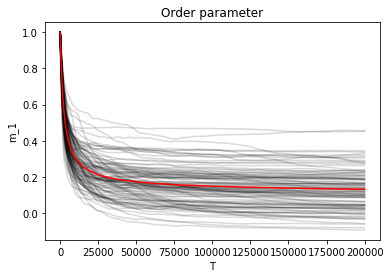

In [6]:

m_1_average = []
for i in pyprind.prog_bar(range(100)):
    
    
#########################  Create random pattern ##############################
    
    randomPatterns = []
    for i in range(45):
        pattern = np.asarray(list(map(lambda x: -1 if x==0 else 1, 
                                      np.random.randint(2, size=N_neurons))))
        randomPatterns.append(pattern)
    randomPatterns = np.asarray(randomPatterns)
    Weights = generateWeightMatrix(randomPatterns)
    neurons_currentState = np.copy(randomPatterns[0])
    noisy_dynamics_average = []
    
    
####################### Run each experiment   ##################################

    for j in range(T):
        selectedNeuron = np.random.choice(np.arange(N_neurons), 1)
        

        #Perform one stochastic asynchronous update 
        noisy_dynamics_average.append(np.dot(neurons_currentState,
                                         randomPatterns[0].T)/N_neurons)
    
        b_i = np.dot(Weights[selectedNeuron,:], neurons_currentState.T)
        prob = 1/(1+math.exp(-4*b_i))
        #print(prob)
        neurons_updatedState = np.copy(neurons_currentState)
    
        neurons_updatedState[selectedNeuron] = np.random.choice([-1,1],
                                                                1,p=[1-prob , prob])
    
        neurons_currentState = np.copy(neurons_updatedState)
        final_state= np.copy(neurons_updatedState)                         
        

    order_parameter_t = np.cumsum(noisy_dynamics_average)



                                 
    m1_for_i_realisation = list(map(lambda x, y: x / y, 
                                    order_parameter_t, np.arange(1,T+1)))
    
    m_1_average.append(m1_for_i_realisation)
    plt.title('Order parameter')
    plt.plot(np.arange(1,T+1), m1_for_i_realisation, alpha=0.15,c ='k')
    plt.xlabel('T')
    plt.ylabel('m_1')
    

    
#np.mean(mean_adj_rand_score, axis=0)
plt.plot(np.arange(1,T+1), np.mean(m_1_average,axis=0), alpha=1,c ='r')
plt.show()

- The <span style="color:red"> red</span> line represents $\langle m_\mu \rangle$
- Grey lines are different realisations, the black cluster at the top are many realisations clumped together

In [7]:
print(np.mean(m_1_average,axis=0)[-10:])

[0.13120916 0.13120905 0.13120894 0.13120883 0.13120871 0.1312086
 0.13120849 0.13120838 0.13120827 0.13120815]
